# Prediciton of Strokes using Artificial Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

## Importing the dataset and checking the data

In [2]:
strokes_df = pd.read_csv(r"D:\001_Data\Completed\Python Projects\Stroke Dataset\healthcare-dataset-stroke-data.csv")

In [3]:
strokes_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
strokes_df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
strokes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
strokes_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
strokes_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
strokes_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
cols = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']

In [10]:
strokes_df = strokes_df[cols]

In [11]:
strokes_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Exploratory Data Analysis

In [12]:
strokes_df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Text(0, 0.5, 'Count')

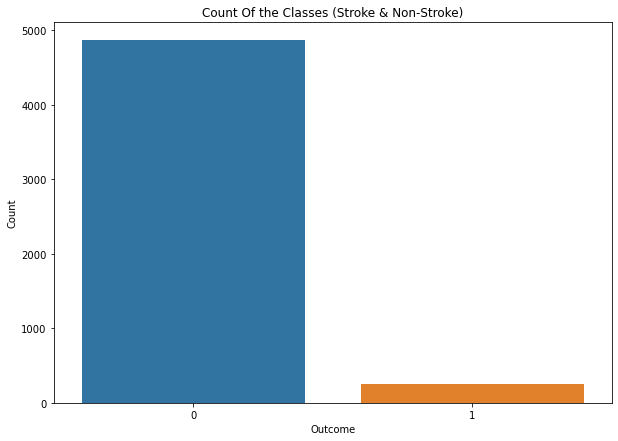

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(strokes_df["stroke"])
plt.title("Count Of the Classes (Stroke & Non-Stroke)")
plt.xlabel("Outcome")
plt.ylabel("Count")

Text(0, 0.5, 'Age')

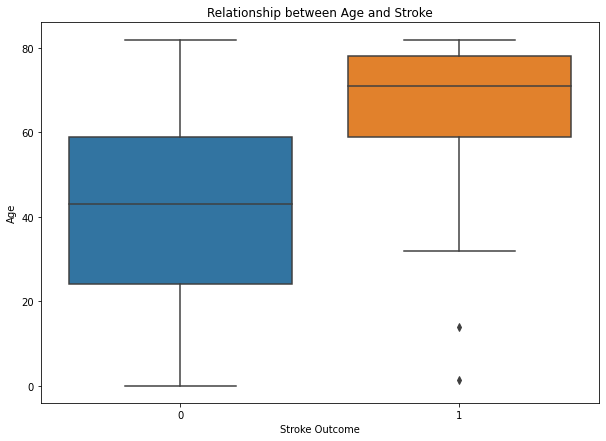

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(x="stroke", y="age", data=strokes_df)
plt.title("Relationship between Age and Stroke")
plt.xlabel("Stroke Outcome")
plt.ylabel("Age")

Text(0, 0.5, 'Average Glucose Level')

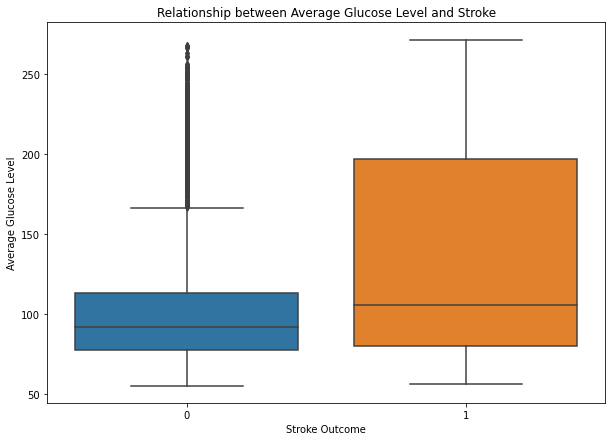

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x="stroke", y="avg_glucose_level", data=strokes_df)
plt.title("Relationship between Average Glucose Level and Stroke")
plt.xlabel("Stroke Outcome")
plt.ylabel("Average Glucose Level")

Text(0, 0.5, 'BMI')

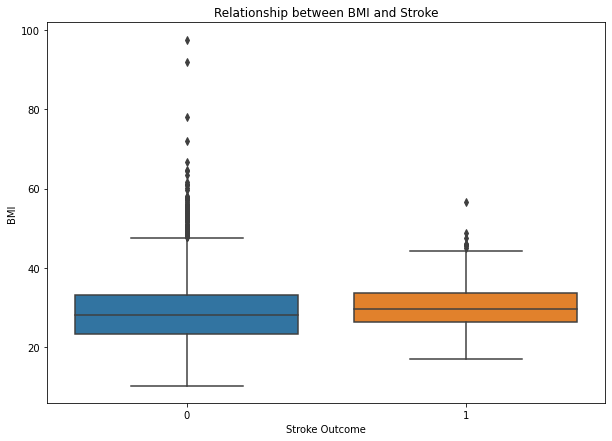

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(x="stroke", y="bmi", data=strokes_df)
plt.title("Relationship between BMI and Stroke")
plt.xlabel("Stroke Outcome")
plt.ylabel("BMI")

Text(0, 0.5, 'Count')

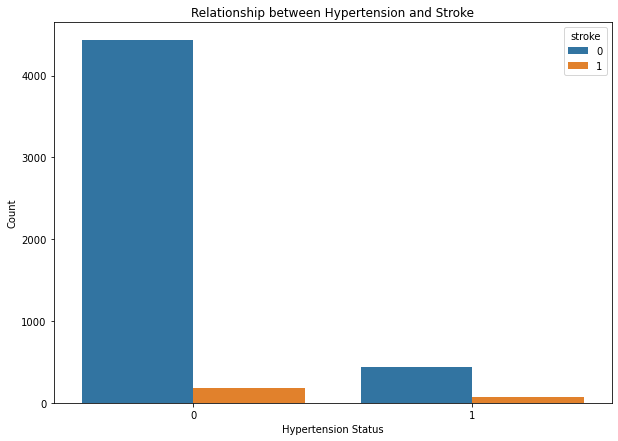

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(x="hypertension", data=strokes_df, hue="stroke")
plt.title("Relationship between Hypertension and Stroke")
plt.xlabel("Hypertension Status")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

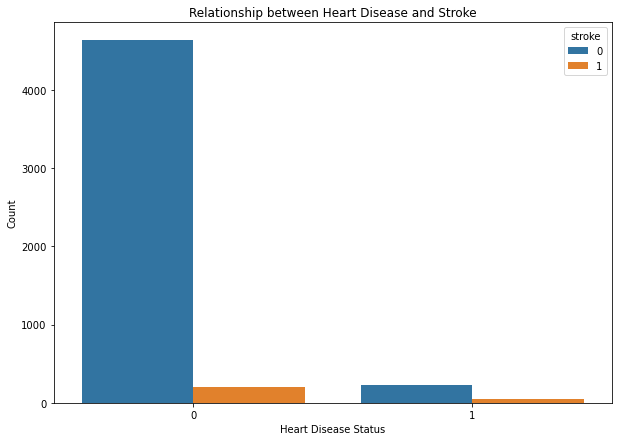

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(x="heart_disease", data=strokes_df, hue="stroke")
plt.title("Relationship between Heart Disease and Stroke")
plt.xlabel("Heart Disease Status")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

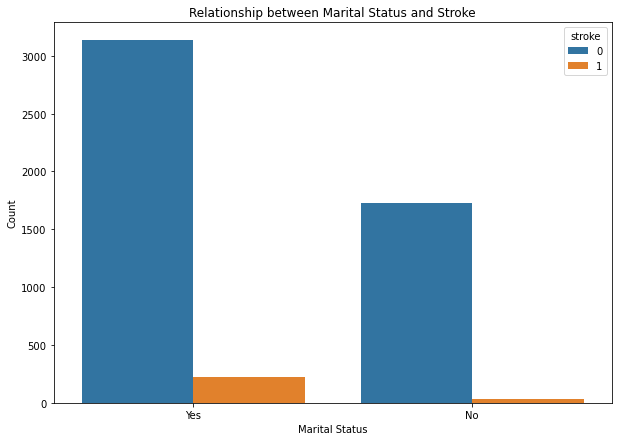

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(x="ever_married", data=strokes_df, hue="stroke")
plt.title("Relationship between Marital Status and Stroke")
plt.xlabel("Marital Status")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

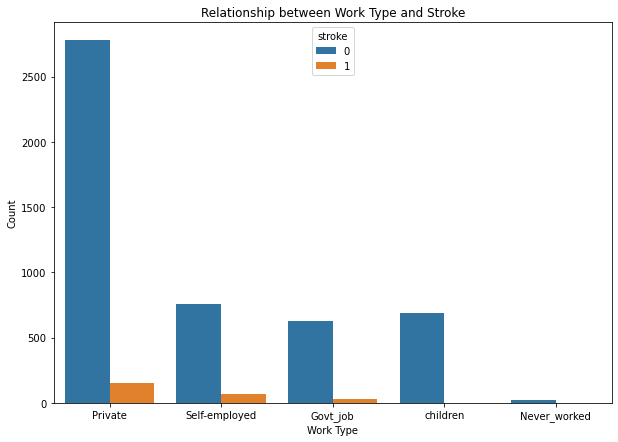

In [20]:
plt.figure(figsize=(10,7))
sns.countplot(x="work_type", data=strokes_df, hue="stroke")
plt.title("Relationship between Work Type and Stroke")
plt.xlabel("Work Type")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

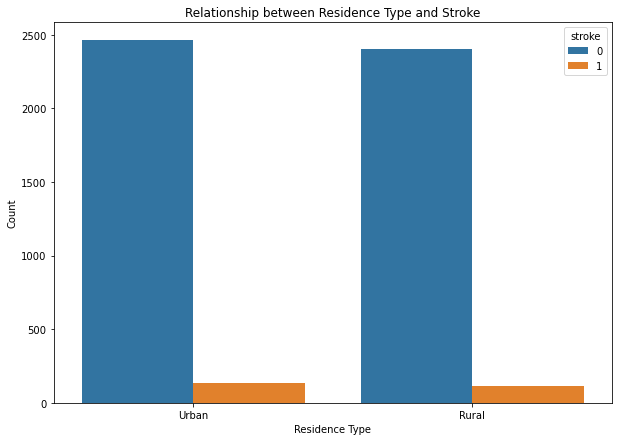

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(x="Residence_type", data=strokes_df, hue="stroke")
plt.title("Relationship between Residence Type and Stroke")
plt.xlabel("Residence Type")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

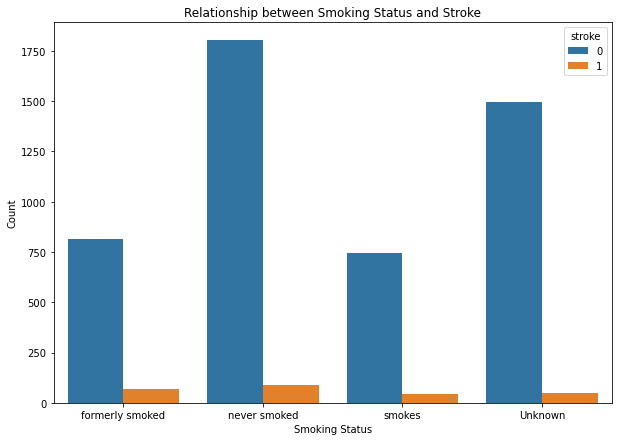

In [22]:
plt.figure(figsize=(10,7))
sns.countplot(x="smoking_status", data=strokes_df, hue="stroke")
plt.title("Relationship between Smoking Status and Stroke")
plt.xlabel("Smoking Status")
plt.ylabel("Count")

## Data Pre-Processing

In [23]:
strokes_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [24]:
gender_dummies = pd.get_dummies(strokes_df["gender"])
married_dummies = pd.get_dummies(strokes_df["ever_married"])
work_dummies = pd.get_dummies(strokes_df["work_type"])
residence_dummies = pd.get_dummies(strokes_df["Residence_type"])
smoking_dummies = pd.get_dummies(strokes_df["smoking_status"])

In [25]:
strokes_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [26]:
strokes_df = strokes_df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','stroke']]

In [27]:
df = pd.concat([strokes_df, gender_dummies, married_dummies, work_dummies, residence_dummies, smoking_dummies], axis="columns")

In [28]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'Female', 'Male', 'Other', 'No', 'Yes', 'Govt_job',
       'Never_worked', 'Private', 'Self-employed', 'children', 'Rural',
       'Urban', 'Unknown', 'formerly smoked', 'never smoked', 'smokes'],
      dtype='object')

In [29]:
df = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'Female', 'Male', 'No','Govt_job',
       'Never_worked', 'Private', 'Self-employed', 'Rural', 'formerly smoked', 'never smoked', 'smokes']]

In [30]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,No,Govt_job,Never_worked,Private,Self-employed,Rural,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,0,1,0,0,1,0,0
1,61.0,0,0,202.21,NaN,1,1,0,0,0,0,0,1,1,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,0,1,0,1,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,0,0,1,1,0,1,0


In [31]:
df.isnull().sum()

age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
Female                 0
Male                   0
No                     0
Govt_job               0
Never_worked           0
Private                0
Self-employed          0
Rural                  0
formerly smoked        0
never smoked           0
smokes                 0
dtype: int64

In [32]:
bmiMedianValue = df["bmi"].median() 

In [33]:
print(bmiMedianValue)

28.1


In [34]:
df["bmi"].fillna(bmiMedianValue,inplace=True)

In [35]:
df.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
Female               0
Male                 0
No                   0
Govt_job             0
Never_worked         0
Private              0
Self-employed        0
Rural                0
formerly smoked      0
never smoked         0
smokes               0
dtype: int64

In [36]:
df["bmi"].describe()

count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap')

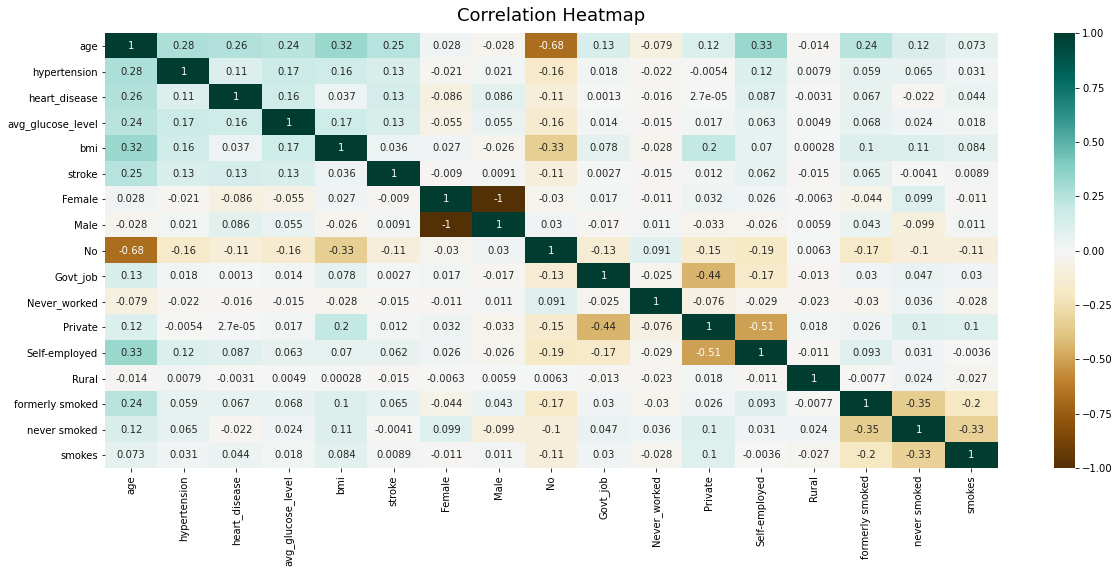

In [37]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

## Feature Selection

In [38]:
from sklearn.feature_selection import SelectKBest, chi2

In [39]:
X = df.drop("stroke", axis=1)
y = df["stroke"]

In [40]:
bestFeatures = SelectKBest(score_func=chi2, k=10)
fit = bestFeatures.fit(X,y)

In [41]:
scores = pd.DataFrame(fit.scores_)
cols = pd.DataFrame(X.columns)

In [42]:
bestFeaturesDf = pd.concat([cols, scores], axis=1)
bestFeaturesDf.columns = ['Features', 'Score']

In [43]:
print(bestFeaturesDf)

             Features        Score
0                 age  3635.226911
1        hypertension    75.449498
2       heart_disease    87.987436
3   avg_glucose_level  1718.285446
4                 bmi    13.683435
5              Female     0.172411
6                Male     0.248952
7                  No    39.355836
8            Govt_job     0.031905
9        Never_worked     1.126929
10            Private     0.308806
11      Self-employed    16.584252
12              Rural     0.620311
13    formerly smoked    17.607359
14       never smoked     0.054854
15             smokes     0.345288


In [44]:
print(bestFeaturesDf.nlargest(8, "Score"))

             Features        Score
0                 age  3635.226911
3   avg_glucose_level  1718.285446
2       heart_disease    87.987436
1        hypertension    75.449498
7                  No    39.355836
13    formerly smoked    17.607359
11      Self-employed    16.584252
4                 bmi    13.683435


In [45]:
bestOnes = ['age', 'avg_glucose_level', 'bmi', 'heart_disease', 'hypertension', 'No', 'formerly smoked', 'Self-employed']

In [46]:
df[bestOnes].describe()

,age,avg_glucose_level,bmi,heart_disease,hypertension,No,formerly smoked,Self-employed
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.862035,0.054012,0.097456,0.343836,0.173190,0.160274
std,22.612647,45.283560,7.699562,0.226063,0.296607,0.475034,0.378448,0.366896
min,0.080000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,91.885000,28.100000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,114.090000,32.800000,0.000000,0.000000,1.000000,0.000000,0.000000
max,82.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
X = df[bestOnes]
y = df["stroke"]

In [48]:
print(X.shape, y.shape)

(5110, 8) (5110,)


In [49]:
X.head()

,age,avg_glucose_level,bmi,heart_disease,hypertension,No,formerly smoked,Self-employed
0,67.0,228.69,36.6,1,0,0,1,0
1,61.0,202.21,28.1,0,0,0,0,1
2,80.0,105.92,32.5,1,0,0,0,0
3,49.0,171.23,34.4,0,0,0,0,0
4,79.0,174.12,24.0,0,1,0,0,1


## Working on the Imbalanced Data

In [50]:
from imblearn.combine import SMOTETomek 
from collections import Counter

Text(0, 0.5, 'Count')

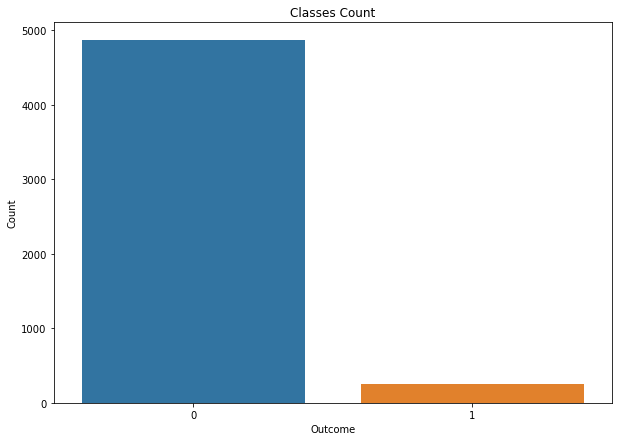

In [51]:
plt.figure(figsize=(10,7))
sns.countplot(strokes_df["stroke"])
plt.title("Classes Count")
plt.xlabel("Outcome")
plt.ylabel("Count")

In [52]:
yes_stroke = df[df["stroke"] == 1]
no_stroke = df[df["stroke"] == 0]

In [53]:
print(yes_stroke.shape, no_stroke.shape)

(249, 17) (4861, 17)


In [54]:
smote = SMOTETomek(random_state=123)

In [55]:
X_res, y_res = smote.fit_resample(X, y)

In [56]:
print(X_res.shape, y_res.shape)

(9572, 8) (9572,)


In [57]:
print("Original dataset shape {}".format(Counter(y)))
print("Resampled dataset shape {}".format(Counter(y_res)))

Original dataset shape Counter({0: 4861, 1: 249})
Resampled dataset shape Counter({1: 4786, 0: 4786})


In [58]:
y_res.value_counts()

1    4786
0    4786
Name: stroke, dtype: int64

In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
scaler = MinMaxScaler()

In [62]:
X_res = scaler.fit_transform(X_res)
X_test = scaler.fit_transform(X_test)

In [63]:
print(X_res.shape, X_test.shape)

(9572, 8) (1533, 8)


## ANN Model

### 1. Model with Nadam Optimizer

In [64]:
model_1 = tf.keras.models.Sequential()

In [65]:
model_1.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(8,)))

In [66]:
model_1.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [67]:
model_1.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [68]:
model_1.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

In [69]:
model_1.compile(optimizer = tf.keras.optimizers.Nadam(learning_rate=0.1), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [70]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [71]:
model_1.fit(x= X_res, y= y_res, epochs=150)

Epoch 1/150
300/300 [==============================] - 1s 2ms/step - loss: 0.5475 - accuracy: 0.7233
Epoch 2/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4434 - accuracy: 0.7952
Epoch 3/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4401 - accuracy: 0.8048
Epoch 4/150
300/300 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.8067
Epoch 5/150
300/300 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8074
Epoch 6/150
300/300 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.8094
Epoch 7/150
300/300 [==============================] - 0s 1ms/step - loss: 0.4471 - accuracy: 0.7990
Epoch 8/150
300/300 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.7988
Epoch 9/150
300/300 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8032
Epoch 10/150
300/300 [==============================] - 0s 1ms/step - loss: 0.4213 - accura

Epoch 81/150
300/300 [==============================] - 0s 929us/step - loss: 0.3936 - accuracy: 0.8239
Epoch 82/150
300/300 [==============================] - 0s 904us/step - loss: 0.3947 - accuracy: 0.8248
Epoch 83/150
300/300 [==============================] - 0s 899us/step - loss: 0.3939 - accuracy: 0.8215
Epoch 84/150
300/300 [==============================] - 0s 902us/step - loss: 0.3932 - accuracy: 0.8241
Epoch 85/150
300/300 [==============================] - 0s 922us/step - loss: 0.3959 - accuracy: 0.8209
Epoch 86/150
300/300 [==============================] - 0s 887us/step - loss: 0.3938 - accuracy: 0.8199
Epoch 87/150
300/300 [==============================] - 0s 908us/step - loss: 0.3941 - accuracy: 0.8241
Epoch 88/150
300/300 [==============================] - 0s 912us/step - loss: 0.3947 - accuracy: 0.8235
Epoch 89/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3905 - accuracy: 0.8276
Epoch 90/150
300/300 [==============================] - 1s 2ms/ste

### 2. Model with Adamax Optimizer

In [72]:
model_2 = tf.keras.models.Sequential()

In [73]:
model_2.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(8,)))

In [74]:
model_2.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [75]:
model_2.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [76]:
model_2.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

In [77]:
model_2.compile(optimizer = tf.keras.optimizers.Adamax(learning_rate=0.1), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [78]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [79]:
model_2.fit(x= X_res, y= y_res, epochs=150)

Epoch 1/150
300/300 [==============================] - 0s 842us/step - loss: 0.4727 - accuracy: 0.7756
Epoch 2/150
300/300 [==============================] - 0s 899us/step - loss: 0.4059 - accuracy: 0.8148
Epoch 3/150
300/300 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.8130
Epoch 4/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4041 - accuracy: 0.8186
Epoch 5/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4024 - accuracy: 0.8172
Epoch 6/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4052 - accuracy: 0.8168: 0s - loss: 0.4
Epoch 7/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3987 - accuracy: 0.8229
Epoch 8/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3988 - accuracy: 0.8223
Epoch 9/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3925 - accuracy: 0.8262
Epoch 10/150
300/300 [==============================] - 1s 2ms/step - l

300/300 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8531
Epoch 81/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8532
Epoch 82/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8541
Epoch 83/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3394 - accuracy: 0.8550
Epoch 84/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3403 - accuracy: 0.8535
Epoch 85/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8531
Epoch 86/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8520
Epoch 87/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3406 - accuracy: 0.8588
Epoch 88/150
300/300 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8529
Epoch 89/150
300/300 [==============================] - 0s 828us/step - loss: 0.3382 - accuracy

### 3. Model with Adam Optimizer

In [80]:
model_3 = tf.keras.models.Sequential()

In [81]:
model_3.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(8,)))

In [82]:
model_3.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [83]:
model_3.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [84]:
model_3.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

In [85]:
model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.1), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [86]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [87]:
model_3.fit(x= X_res, y= y_res, epochs=150)

Epoch 1/150
300/300 [==============================] - 1s 2ms/step - loss: 0.5178 - accuracy: 0.7332
Epoch 2/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4278 - accuracy: 0.8051
Epoch 3/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4292 - accuracy: 0.8030
Epoch 4/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4252 - accuracy: 0.8065
Epoch 5/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4280 - accuracy: 0.8005
Epoch 6/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4295 - accuracy: 0.8055
Epoch 7/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4126 - accuracy: 0.8128
Epoch 8/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4208 - accuracy: 0.8029
Epoch 9/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4115 - accuracy: 0.8110
Epoch 10/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4253 - accura

300/300 [==============================] - 1s 3ms/step - loss: 0.4138 - accuracy: 0.8107
Epoch 82/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4152 - accuracy: 0.8094
Epoch 83/150
300/300 [==============================] - 1s 3ms/step - loss: 0.4076 - accuracy: 0.8130
Epoch 84/150
300/300 [==============================] - 1s 3ms/step - loss: 0.4191 - accuracy: 0.8070
Epoch 85/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4204 - accuracy: 0.8083
Epoch 86/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4188 - accuracy: 0.8082
Epoch 87/150
300/300 [==============================] - 1s 3ms/step - loss: 0.4074 - accuracy: 0.8146
Epoch 88/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4141 - accuracy: 0.8108
Epoch 89/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4106 - accuracy: 0.8118
Epoch 90/150
300/300 [==============================] - 1s 3ms/step - loss: 0.4135 - accuracy: 

### 4. Model with SGD Optimizer

In [88]:
model_4 = tf.keras.models.Sequential()

In [89]:
model_4.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(8,)))

In [90]:
model_4.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [91]:
model_4.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [92]:
model_4.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

In [93]:
model_4.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.1), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [94]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [95]:
model_4.fit(x= X_res, y= y_res, epochs=150)

Epoch 1/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4916 - accuracy: 0.7586
Epoch 2/150
300/300 [==============================] - 1s 3ms/step - loss: 0.4097 - accuracy: 0.8108
Epoch 3/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4049 - accuracy: 0.8160
Epoch 4/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3993 - accuracy: 0.8195
Epoch 5/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3990 - accuracy: 0.8214
Epoch 6/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3972 - accuracy: 0.8206
Epoch 7/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.8205
Epoch 8/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3959 - accuracy: 0.8201
Epoch 9/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3936 - accuracy: 0.8215
Epoch 10/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3941 - accura

300/300 [==============================] - 1s 2ms/step - loss: 0.3269 - accuracy: 0.8599
Epoch 82/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3268 - accuracy: 0.8572
Epoch 83/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3282 - accuracy: 0.8588
Epoch 84/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3276 - accuracy: 0.8590
Epoch 85/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3267 - accuracy: 0.8593
Epoch 86/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3252 - accuracy: 0.8569
Epoch 87/150
300/300 [==============================] - 1s 2ms/step - loss: 0.3251 - accuracy: 0.8581
Epoch 88/150
300/300 [==============================] - 1s 3ms/step - loss: 0.3243 - accuracy: 0.8608
Epoch 89/150
300/300 [==============================] - 1s 3ms/step - loss: 0.3258 - accuracy: 0.8618
Epoch 90/150
300/300 [==============================] - 1s 3ms/step - loss: 0.3222 - accuracy: 

### 5. Model with RMSprop Optimizer

In [104]:
model_5 = tf.keras.models.Sequential()

In [105]:
model_5.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(8,)))

In [106]:
model_5.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [107]:
model_5.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [108]:
model_5.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

In [109]:
model_5.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.1), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [110]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [111]:
model_5.fit(x= X_res, y= y_res, epochs=150)

Epoch 1/150
300/300 [==============================] - 1s 2ms/step - loss: 1.9359 - accuracy: 0.6989
Epoch 2/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4664 - accuracy: 0.7817
Epoch 3/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4531 - accuracy: 0.7928
Epoch 4/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4392 - accuracy: 0.8018
Epoch 5/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4535 - accuracy: 0.7933
Epoch 6/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4421 - accuracy: 0.8007
Epoch 7/150
300/300 [==============================] - 1s 3ms/step - loss: 0.4451 - accuracy: 0.8038
Epoch 8/150
300/300 [==============================] - 1s 3ms/step - loss: 0.4390 - accuracy: 0.8043
Epoch 9/150
300/300 [==============================] - 1s 3ms/step - loss: 0.4535 - accuracy: 0.7971
Epoch 10/150
300/300 [==============================] - 1s 3ms/step - loss: 0.4475 - accura

300/300 [==============================] - 1s 3ms/step - loss: 0.4367 - accuracy: 0.8131
Epoch 82/150
300/300 [==============================] - 1s 3ms/step - loss: 0.4351 - accuracy: 0.8161
Epoch 83/150
300/300 [==============================] - 1s 3ms/step - loss: 0.4685 - accuracy: 0.8171
Epoch 84/150
300/300 [==============================] - 1s 3ms/step - loss: 0.4479 - accuracy: 0.8122
Epoch 85/150
300/300 [==============================] - 1s 3ms/step - loss: 0.4370 - accuracy: 0.8206
Epoch 86/150
300/300 [==============================] - 1s 3ms/step - loss: 0.4330 - accuracy: 0.8193
Epoch 87/150
300/300 [==============================] - 1s 3ms/step - loss: 0.4335 - accuracy: 0.8114
Epoch 88/150
300/300 [==============================] - 1s 3ms/step - loss: 0.4373 - accuracy: 0.8113
Epoch 89/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4369 - accuracy: 0.8152
Epoch 90/150
300/300 [==============================] - 1s 2ms/step - loss: 0.4417 - accuracy: 

### Evaluating the models

In [112]:
print("Evaluate on test data - Nadam Optimizer")
test_loss, test_acc = model_1.evaluate(X_test, y_test)
print("Test Loss: ", test_loss, "\n")
print("Test Accuracy: ", test_acc)

Evaluate on test data - Nadam Optimizer
48/48 [==============================] - 0s 3ms/step - loss: 0.2990 - accuracy: 0.8695
Test Loss:  0.2990114092826843 

Test Accuracy:  0.8695368766784668


In [113]:
print("Evaluate on test data - Adamax Optimizer")
test_loss_2, test_acc_2 = model_2.evaluate(X_test, y_test)
print("Test Loss: ", test_loss_2, "\n")
print("Test Accuracy: ", test_acc_2)

Evaluate on test data - Adamax Optimizer
48/48 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.8141
Test Loss:  0.3781340420246124 

Test Accuracy:  0.8140900135040283


In [114]:
print("Evaluate on test data - Adam Optimizer")
test_loss_3, test_acc_3 = model_3.evaluate(X_test, y_test)
print("Test Loss: ", test_loss_3, "\n")
print("Test Accuracy: ", test_acc_3)

Evaluate on test data - Adam Optimizer
48/48 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.7736
Test Loss:  0.43310263752937317 

Test Accuracy:  0.7736464738845825


In [115]:
print("Evaluate on test data - SGD Optimizer")
test_loss_4, test_acc_4 = model_4.evaluate(X_test, y_test)
print("Test Loss: ", test_loss_4, "\n")
print("Test Accuracy: ", test_acc_4)

Evaluate on test data - SGD Optimizer
48/48 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8108
Test Loss:  0.42436572909355164 

Test Accuracy:  0.810828447341919


In [116]:
print("Evaluate on test data - RMSprop Optimizer")
test_loss_5, test_acc_5 = model_5.evaluate(X_test, y_test)
print("Test Loss: ", test_loss_5, "\n")
print("Test Accuracy: ", test_acc_5)

Evaluate on test data - RMSprop Optimizer
48/48 [==============================] - 0s 2ms/step - loss: 0.8268 - accuracy: 0.6725
Test Loss:  0.8268325328826904 

Test Accuracy:  0.6725375056266785


## Saving the best model

In [117]:
Keras_file = "Strokes_Predictor.h5"

In [118]:
tf.keras.models.save_model(model_1, Keras_file)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("Strokesv2.tflite","wb").write(tfmodel)